
Gradient Boosting Model Performance:
RMSE: $36.56
R² Score: 0.9883
MAPE Score: 6.1585


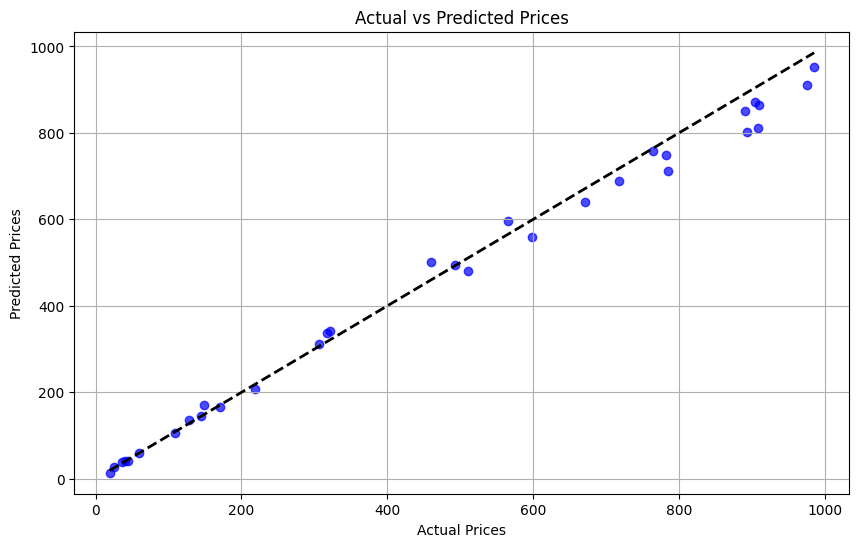

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import pickle

# Read and prepare the data
def prepare_data(data):
    # Convert price from string to float
    data['Price'] = data['Price'].str.replace('$', '').str.replace(',', '').astype(float)
    
    # Select features and target (RM Cost/Lb does not require string processing)
    X = data[['Length (inches)', 'Weight (lbs)', 'Diameter (inches)','F22','4130','JFE Lion','TenarisHydril Blue®','VAM TOP®','Phosphating', 'Xylan Coating','Ni Plating','Cu Plating','Carbide Coating']]
    y = data['Price']
    
    return X, y

# Create and evaluate the model
def train_evaluate_model(X, y):
    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Create and train the model
    model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Calculate metrics
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    msae = np.sum(np.abs(y_test - y_pred))  # Minimum Sum of Absolute Errors
    mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
    
    # Print results
    print("\nGradient Boosting Model Performance:")
    print(f"RMSE: ${rmse:.2f}")
    print(f"R² Score: {r2:.4f}")
    print(f"MAPE Score: {mape:.4f}")

   
    
    # Plot actual vs predicted prices
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, y_pred, alpha=0.7, color='b')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
    plt.xlabel('Actual Prices')
    plt.ylabel('Predicted Prices')
    plt.title('Actual vs Predicted Prices')
    plt.grid(True)
    plt.show()
    

    


 
    
    return model, X_test, y_test, y_pred

# Main execution
def main():
    # Read the data
    data = pd.read_csv('/Users/manassingh/mlManufacturing/FINAL_DATASET_ML_MANUFACTURING - Sheet15.csv')
    
    # Prepare the data
    X, y = prepare_data(data)
    
    # Train and evaluate the model
    model, X_test, y_test, y_pred = train_evaluate_model(X, y)
    
    # Save the trained model using pickle
    with open('trained_model2.pkl', 'wb') as f:
        pickle.dump(model, f)
    
    return model

if __name__ == "__main__":
    model = main()






Linear Regression Model Performance:
RMSE: $51.25
R² Score: 0.9771
MAPE: 30.3304%


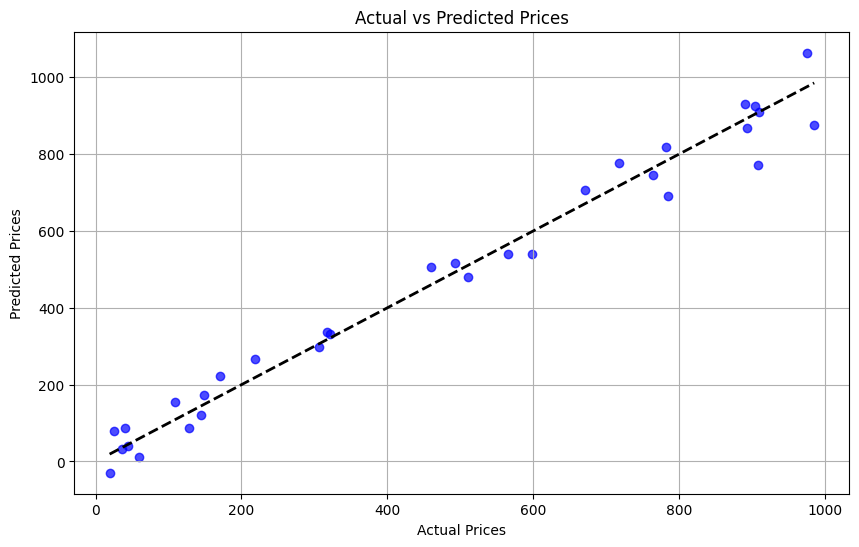

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import pickle

# Read and prepare the data
def prepare_data(data):
    # Convert price from string to float
    data['Price'] = data['Price'].str.replace('$', '').str.replace(',', '').astype(float)
    
    # Select features and target (RM Cost/Lb does not require string processing)
    X = data[['Length (inches)', 'Weight (lbs)', 'Diameter (inches)','F22','4130','JFE Lion','TenarisHydril Blue®','VAM TOP®','Phosphating', 'Xylan Coating','Ni Plating','Cu Plating','Carbide Coating']]
    y = data['Price']
    
    return X, y

# Create and evaluate the Linear Regression model
def train_evaluate_model(X, y):
    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Create and train the model
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Calculate metrics
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
    
    # Print results
    print("\nLinear Regression Model Performance:")
    print(f"RMSE: ${rmse:.2f}")
    print(f"R² Score: {r2:.4f}")
    print(f"MAPE: {mape:.4f}%")
    
    # Plot actual vs predicted prices
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, y_pred, alpha=0.7, color='b')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
    plt.xlabel('Actual Prices')
    plt.ylabel('Predicted Prices')
    plt.title('Actual vs Predicted Prices')
    plt.grid(True)
    plt.show()
    
    
    
    return model, X_test, y_test, y_pred

# Main execution
def main():
    # Read the data
    data = pd.read_csv('/Users/manassingh/mlManufacturing/FINAL_DATASET_ML_MANUFACTURING - Sheet15.csv')
    
    # Prepare the data
    X, y = prepare_data(data)
    
    # Train and evaluate the model
    model, X_test, y_test, y_pred = train_evaluate_model(X, y)
    
    # Save the trained model using pickle
    with open('linear_regression_model.pkl', 'wb') as f:
        pickle.dump(model, f)
    
    return model

if __name__ == "__main__":
    model = main()



Decision Tree Model Performance:
RMSE: $75.48
R² Score: 0.9503
MAPE: 12.9540%


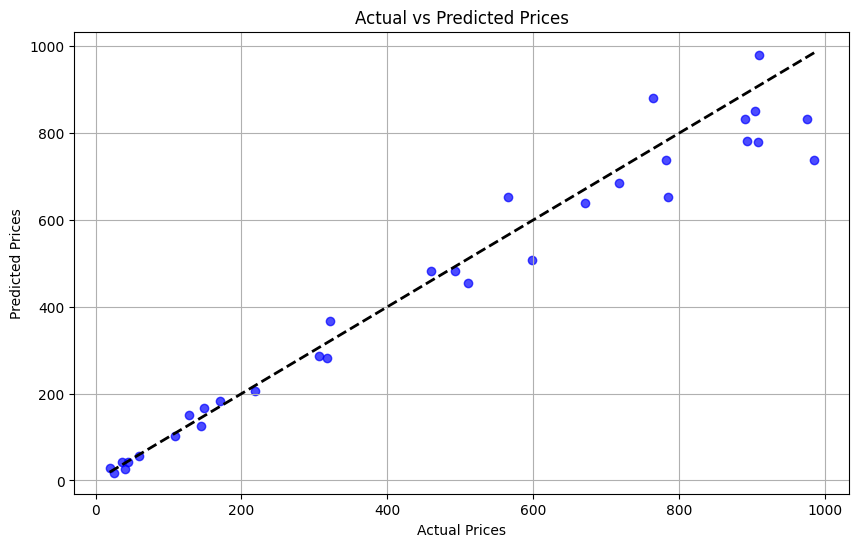

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import pickle

# Read and prepare the data
def prepare_data(data):
    # Convert price from string to float
    data['Price'] = data['Price'].str.replace('$', '').str.replace(',', '').astype(float)
    
    # Select features and target (RM Cost/Lb does not require string processing)
    X = data[['Length (inches)', 'Weight (lbs)', 'Diameter (inches)','F22','4130','JFE Lion','TenarisHydril Blue®','VAM TOP®','Phosphating', 'Xylan Coating','Ni Plating','Cu Plating','Carbide Coating']]
    y = data['Price']
    
    return X, y

# Create and evaluate the Decision Tree model
def train_evaluate_model(X, y):
    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Create and train the model
    model = DecisionTreeRegressor(random_state=42)
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Calculate metrics
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
    
    # Print results
    print("\nDecision Tree Model Performance:")
    print(f"RMSE: ${rmse:.2f}")
    print(f"R² Score: {r2:.4f}")
    print(f"MAPE: {mape:.4f}%")
    
    # Plot actual vs predicted prices
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, y_pred, alpha=0.7, color='b')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
    plt.xlabel('Actual Prices')
    plt.ylabel('Predicted Prices')
    plt.title('Actual vs Predicted Prices')
    plt.grid(True)
    plt.show()
    
    return model, X_test, y_test, y_pred

# Main execution
def main():
    # Read the data
    data = pd.read_csv('/Users/manassingh/mlManufacturing/FINAL_DATASET_ML_MANUFACTURING - Sheet15.csv')
    
    # Prepare the data
    X, y = prepare_data(data)
    
    # Train and evaluate the model
    model, X_test, y_test, y_pred = train_evaluate_model(X, y)
    
    # Save the trained model using pickle
    with open('decision_tree_model.pkl', 'wb') as f:
        pickle.dump(model, f)
    
    return model

if __name__ == "__main__":
    model = main()



Random Forest Model Performance:
RMSE: $58.11
R² Score: 0.9705
MAPE: 9.5404%


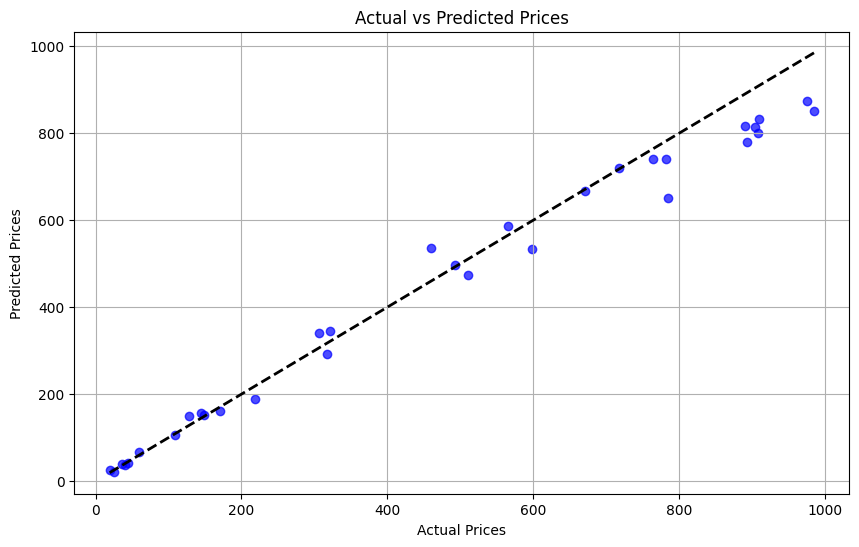

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import pickle

# Read and prepare the data
def prepare_data(data):
    # Convert price from string to float
    data['Price'] = data['Price'].str.replace('$', '').str.replace(',', '').astype(float)
    
    # Select features and target (RM Cost/Lb does not require string processing)
    X = data[['Length (inches)', 'Weight (lbs)', 'Diameter (inches)','F22','4130','JFE Lion','TenarisHydril Blue®','VAM TOP®','Phosphating', 'Xylan Coating','Ni Plating','Cu Plating','Carbide Coating']]
    y = data['Price']
    
    return X, y

# Create and evaluate the Random Forest model
def train_evaluate_model(X, y):
    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Create and train the model
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Calculate metrics
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
    
    # Print results
    print("\nRandom Forest Model Performance:")
    print(f"RMSE: ${rmse:.2f}")
    print(f"R² Score: {r2:.4f}")
    print(f"MAPE: {mape:.4f}%")
    
    # Plot actual vs predicted prices
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, y_pred, alpha=0.7, color='b')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
    plt.xlabel('Actual Prices')
    plt.ylabel('Predicted Prices')
    plt.title('Actual vs Predicted Prices')
    plt.grid(True)
    plt.show()
    
  
    
 
 
    
    return model, X_test, y_test, y_pred

# Main execution
def main():
    # Read the data
    data = pd.read_csv('/Users/manassingh/mlManufacturing/FINAL_DATASET_ML_MANUFACTURING - Sheet15.csv')
    
    # Prepare the data
    X, y = prepare_data(data)
    
    # Train and evaluate the model
    model, X_test, y_test, y_pred = train_evaluate_model(X, y)
    
    # Save the trained model using pickle
    with open('random_forest_model.pkl', 'wb') as f:
        pickle.dump(model, f)
    
    return model

if __name__ == "__main__":
    model = main()
